<a href="https://colab.research.google.com/github/alexfferro/Curso_ML/blob/master/Redes_Neurais_Qualidade_de_Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [92]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/winequality-red.csv')

#Análise Inicial

Este é um conjunto de dados que está analisando a qualidade de vinhos vermelhos, sendo que de acordo com os detalhes do repositorio, caso o vinho possua qualidade de 6,5 ou superior é um vinho "bom" caso contrario é um vinho "ruim". Os valores variam entre 0 e 10. O Pode ser encontrado clicando aqui. 


[Red-Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)




In [93]:
data.rename(columns={'fixed acidity': 'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

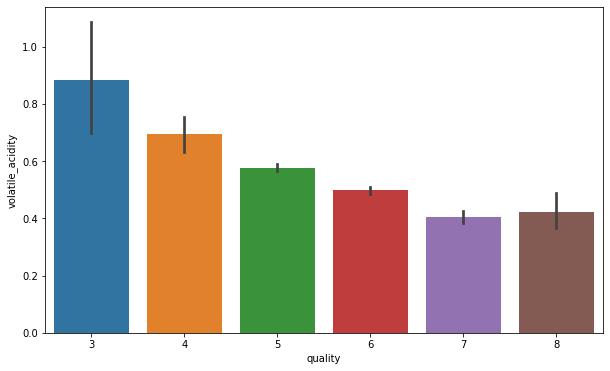

In [94]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile_acidity', data = data)

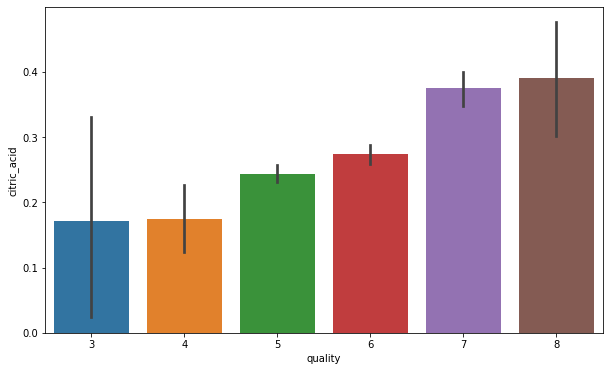

In [95]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric_acid', data = data)

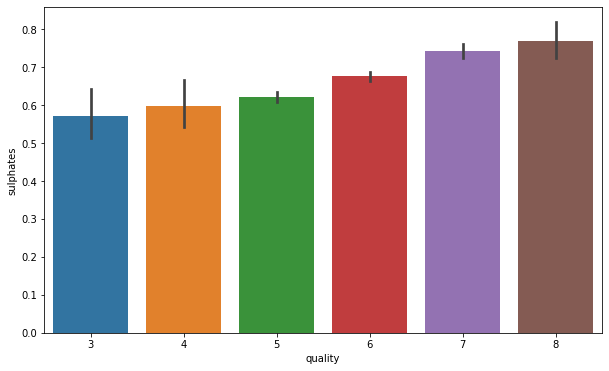

In [96]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

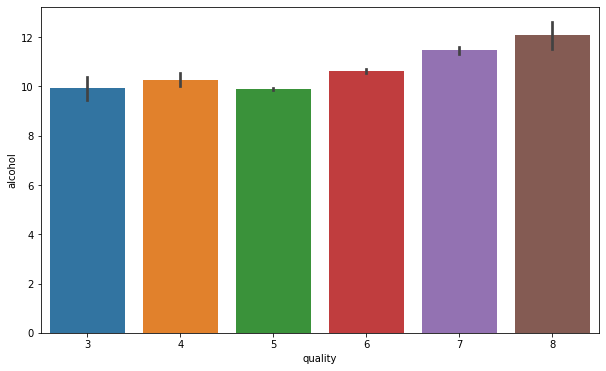

In [97]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = data)

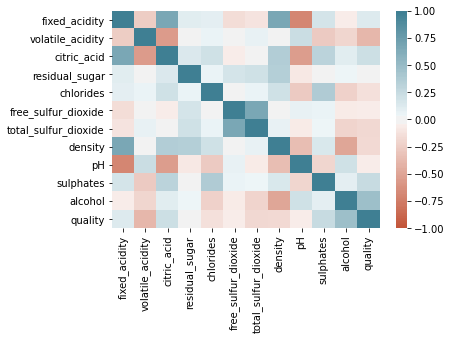

In [98]:
corr = data.corr()
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

#Pré-Processamento de dados para o uso de ML

De acordo com o artigo do dataset, a qualidade dos vinhos podem ser divididas em algumas categorias.
Podemos entender que um vinho que tenha qualidade menor que 6,5 é um vinho ruim, e caso seja maior que 6,5 um bom vinho, se ele for maior que 8 é um vinho excelente. Nosso conjunto de dados possuem uma quantidade de vinhos ruins muito maior que os vinhos bons, então iremos apenas assumir que temos um bom vinho se ele superar a qualidade de 6,5.


In [99]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [100]:
label_quality = LabelEncoder()

In [101]:
data['quality'] = label_quality.fit_transform(data['quality'])

In [102]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [103]:
X = data.drop('quality', axis = 1)
y = data['quality']

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [106]:
sc = StandardScaler()

In [107]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [108]:
classificador = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

In [109]:
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([0.86875   , 0.88125   , 0.84375   , 0.875     , 0.875     ,
       0.91875   , 0.79375   , 0.875     , 0.85625   , 0.88679245])

In [140]:
round(scores.mean(),3),round(scores.std(),3)

(0.867, 0.031)

In [118]:
arvore = DecisionTreeClassifier()

#calculando os scores
scores_arvore = cross_val_score(arvore,X,y,cv=10)

In [119]:
#criando random forest
floresta = RandomForestClassifier()

#calculando os scores
scores_floresta = cross_val_score(floresta,X,y,cv=10)

In [121]:
print('Árvore de Decisão: ', round(scores_arvore.mean(),3),round(scores_arvore.std(),3))
print('Random Forest: ', round(scores.mean(),3),round(scores.std(),3))
print('MLP:', round(scores.mean(),3),round(scores.std(),3))

Árvore de Decisão:  0.824 0.036
Random Forest:  0.867 0.031
MLP: 0.867 0.031


In [122]:
from sklearn.model_selection import RandomizedSearchCV

In [134]:

param_grid = [
              {
                  'hidden_layer_sizes': [(10),(50),(100),(50,10),(100,50)],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'solver': ['lbfgs', 'sgd', 'adam'],
                  'max_iter': [1000,2000,3000]
              }
              
]

In [125]:
mlp = RandomizedSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [135]:
mlp.fit(X,y)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'activation': [

In [138]:
print(mlp.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 10, 'max_iter': 500, 'solver': 'adam'}


In [139]:
print(round(mlp.best_score_,3))

0.876


In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
mlp = GridSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [141]:
param_grid = [
              {
                  'hidden_layer_sizes': [(10),(50),(100),(50,10),(100,50)],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'solver': ['lbfgs', 'sgd', 'adam'],
                  'max_iter': [500,1000,2000]
              }
              
]

In [142]:
mlp.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'activation': [

In [143]:
print(mlp.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (50, 10), 'max_iter': 500, 'solver': 'adam'}


In [144]:
print(mlp.best_score_)

0.8786775078369906


#Resultados


---


* Grid Search : 0.876
* Random Search : 0.876
* Árvore de Decisão:  0.824 0.036
* Random Forest:  0.867 0.031
* MLP: 0.867 0.031


---


Comparando todas as tecnicas utilizadas para predição da qualidade do vinho, dois dos métodos utilizados tiveram uma acuracia parecida, foram a MLP, Random Forest. 

Nas técnicas que utilizaram redes neurais, foi testado diversos parametros de otimização,tanto foram utilizados parametros aleatorios como também o *Grid Search* e os melhores resultados obtidos até então foram esses na lista acima. 

A acuracia que foi obtida atraves da MLP e *Random Tree*, foi consideravelmente mais consistente e confiavel do que os que foram obtidos pela arvore de decisão.


